In [3]:
%pip install seaborn

     -------------------------------------- 292.8/292.8 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sys
import os
import matplotlib.pyplot as plt

In [12]:
#importing the dataset
pwd = os.getcwd() #pwd stands for present working directory
filepath = os.path.join(pwd,"winequality-reds.csv")

In [13]:
data_import = pd.read_csv(filepath)
data_import

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
data_import.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
#finding a correlation between the data and the quality of the wine(Which we have to predict)
dataset_corr = data_import.corr()["quality"].drop("quality")
print(dataset_corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


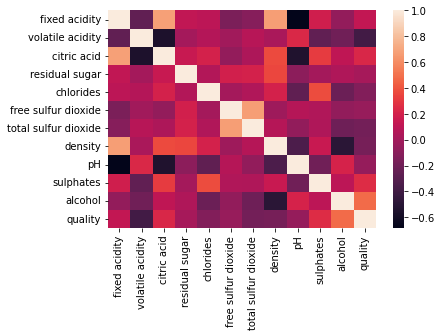

In [29]:
#heatmap
sys.heatmap(data_import.corr())
plt.show()

In [30]:
def get_features(correlation_threshold):
    abs_corr = dataset_corr.abs()   #finding absolute value of the correlations
    high_correlations = abs_corr[abs_corr > correlation_threshold].index.values.tolist()
    return high_correlations

In [31]:
#selecting only the features having correlation more than 0.05
features = get_features(0.05)
X = data_import[features]
y = data_import["quality"]

In [35]:
#splitting data into training and test set
from cgi import test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,y_train)

In [52]:
training_predictions = regressor.predict(X_train)


In [50]:
regressor_predictions = regressor.predict(X_test)
regressor_predictions

array([5.34806679, 5.05517166, 5.66708964, 5.47234795, 5.72724691,
       5.28403318, 5.03791776, 5.1249201 , 5.7464113 , 5.68875405,
       6.1473241 , 5.23079222, 5.54879107, 5.26184998, 5.44792951,
       6.46589846, 5.15102912, 5.59145104, 6.55637705, 5.32101515,
       5.38038714, 5.19595109, 5.94303746, 6.35879384, 5.35177061,
       5.41966382, 6.35921825, 5.34821308, 5.15311857, 6.15638261,
       5.25353216, 5.50782551, 5.76135231, 5.39324373, 5.45778311,
       5.02455666, 6.16081394, 5.68412569, 5.65121061, 6.16728694,
       5.53147931, 5.24262707, 6.17895973, 5.16506044, 5.87547952,
       5.81036214, 6.41918012, 5.60584147, 5.15466816, 5.55353124,
       5.15006163, 5.10868088, 5.58261278, 6.33518958, 4.95206806,
       4.98797839, 6.00934825, 5.39265615, 5.83635018, 5.25203043,
       5.61012632, 5.96277273, 5.27889339, 5.29844861, 6.49130825,
       5.42179306, 6.33931526, 5.24973662, 6.42060641, 5.31516411,
       6.41686942, 4.73860123, 5.79669528, 5.83059838, 6.17512

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_rmse = mean_squared_error(training_predictions, y_train)**0.5
train_rmse

0.6513389413206592

In [54]:
test_rmse = mean_squared_error(regressor_predictions, y_test)**0.5
test_rmse

0.6251864979819244

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, regressor_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, regressor_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, regressor_predictions)))


Mean Absolute Error: 0.5040876719443232
Mean Squared Error: 0.39085815725890277
Root Mean Squared Error: 0.6251864979819244
